# Graph 4

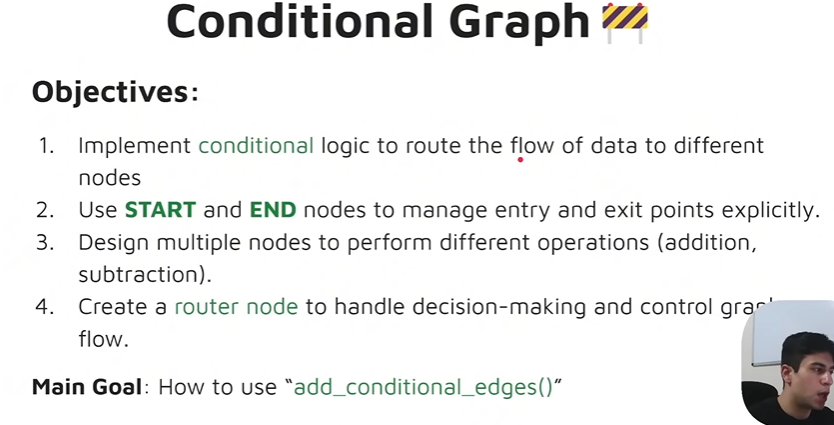

In [23]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

In [24]:
class AgentState(TypedDict):
    number1 : int
    number2 : int
    operation: str
    finalnumber : int

In [29]:
def adder(state:AgentState) -> AgentState:
    """This node adds the number"""
    state["finalnumber"] = state["number1"] + state["number2"]

    return state

def substractor(state:AgentState) -> AgentState:
    """This node subtract the numbers"""
    state["finalnumber"] = state["number1"] - state["number2"]
    return state

def decide_next_node(state:AgentState) -> AgentState:
    """This node will select the node of the graph"""

    if state["operation"] == "+":
        return "addition_operation"
    
    elif state["operation"] == "-":
        return "subtraction_operation"
    

In [30]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", substractor)
graph.add_node("router", lambda state:state)

graph.add_edge(START, "router")

# to join all edges and node
graph.add_conditional_edges(
    "router",
    decide_next_node,

    # to create "path map" which in form of "dictionary"
    {
        # in format of Edge and Node and tell where it will connect to
        "addition_operation" : "add_node",
        "subtraction_operation": "subtract_node"
    }
)

# to cretae the end point
graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

app = graph.compile()

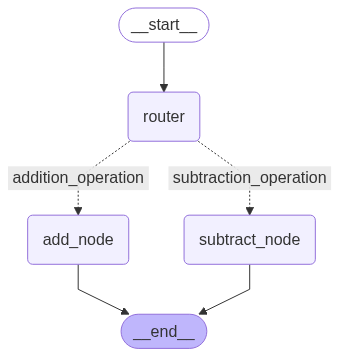

In [31]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [32]:
initial_state = AgentState(number1 = 10, number2 = 5, operation="-")
result = app.invoke(initial_state)
result

{'number1': 10, 'number2': 5, 'operation': '-', 'finalnumber': 5}

In [33]:
result["finalnumber"]

5

# Exercise Graph 4
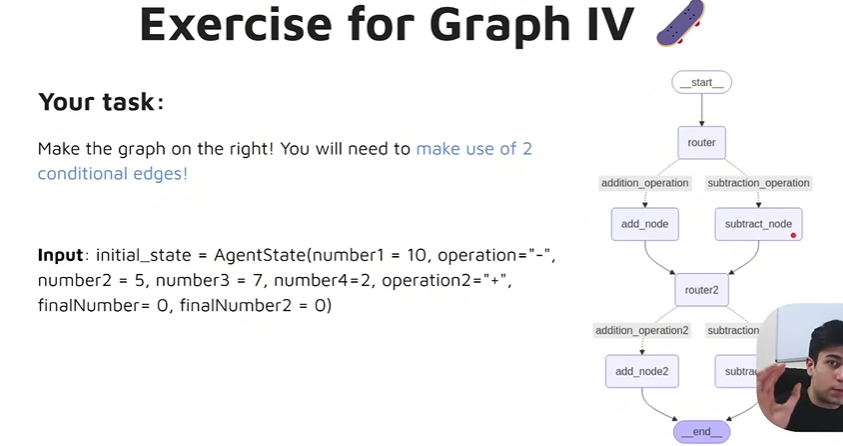

In [34]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [55]:
class AgentState2(TypedDict):
    number1: int
    number2 : int
    number3 : int
    number4 : int
    finalnumber: int
    finalnumber2: int
    operation: str
    operation2: str

def adder(state:AgentState2) -> AgentState2:
    """This adder node add the number"""
    state["finalnumber"] = state["number1"] + state["number2"]
    return state

def subtract(state:AgentState2) -> AgentState2:
    """This subtract node subtract the two number"""
    state["finalnumber"] = state["number1"] - state["number2"]
    return state

def adder2(state:AgentState2) -> AgentState2:
    """This adder2 node adds other 3, 4 number"""
    state["finalnumber2"] =state["number3"] + state["number4"]
    return state

def subtract2(state:AgentState2) -> AgentState2:
    """This subtract2 node subtract 3,4 number"""
    state["finalnumber2"] = state["number3"] - state["number4"]
    return state

def decide_next_node1(state:AgentState2) -> AgentState2:
    """This node ddecides the next node of route1"""
    if state["operation"] == "+":
        return "addition_operation"
    elif state["operation"] == "-":
        return "subtraction_operation"

def decide_next_node2(state:AgentState2) -> AgentState:
    """This node decides the next node of route2"""
    if state["operation2"] == "+":
        return "addition_operation2"
    elif state["operation2"] == "-":
        return "subtraction_operation2"
    


In [56]:
graph = StateGraph(AgentState2)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtract)
graph.add_node("add_node2", adder2)
graph.add_node("subtract_node2", subtract2)
graph.add_node("router", lambda state:state)
graph.add_node("router2", lambda state:state)

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    decide_next_node1,
    {
        "addition_operation":"add_node",
        "subtraction_operation":"subtract_node"
    }
)

graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")

graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        "addition_operation2":"add_node2",
        "subtraction_operation2":"subtract_node2"
    }
)

graph.add_edge("add_node2", END)
graph.add_edge("subtract_node", END)

app1 = graph.compile()



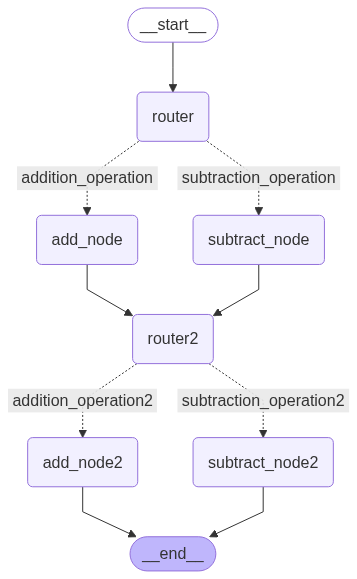

In [57]:
from IPython.display import Image , display
display(Image(app1.get_graph().draw_mermaid_png()))

In [58]:
initial_state = AgentState2(
    number1 = 10, operation="-", number2 = 5, 
    number3=7, number4=2, operation2="+", 
    finalnumber = 0, finalnumber2 = 0
)

result = app1.invoke(initial_state)
print(result)

{'number1': 10, 'number2': 5, 'number3': 7, 'number4': 2, 'finalnumber': 5, 'finalnumber2': 9, 'operation': '-', 'operation2': '+'}
